<a href="https://colab.research.google.com/github/daniyal828/Machine-Learning-Projects/blob/main/BostonHousingAnalysisDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler


In [3]:
# Load the CSV file
df = pd.read_csv("BostonHousing.csv")

# Display the first few rows
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
# Check structure
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

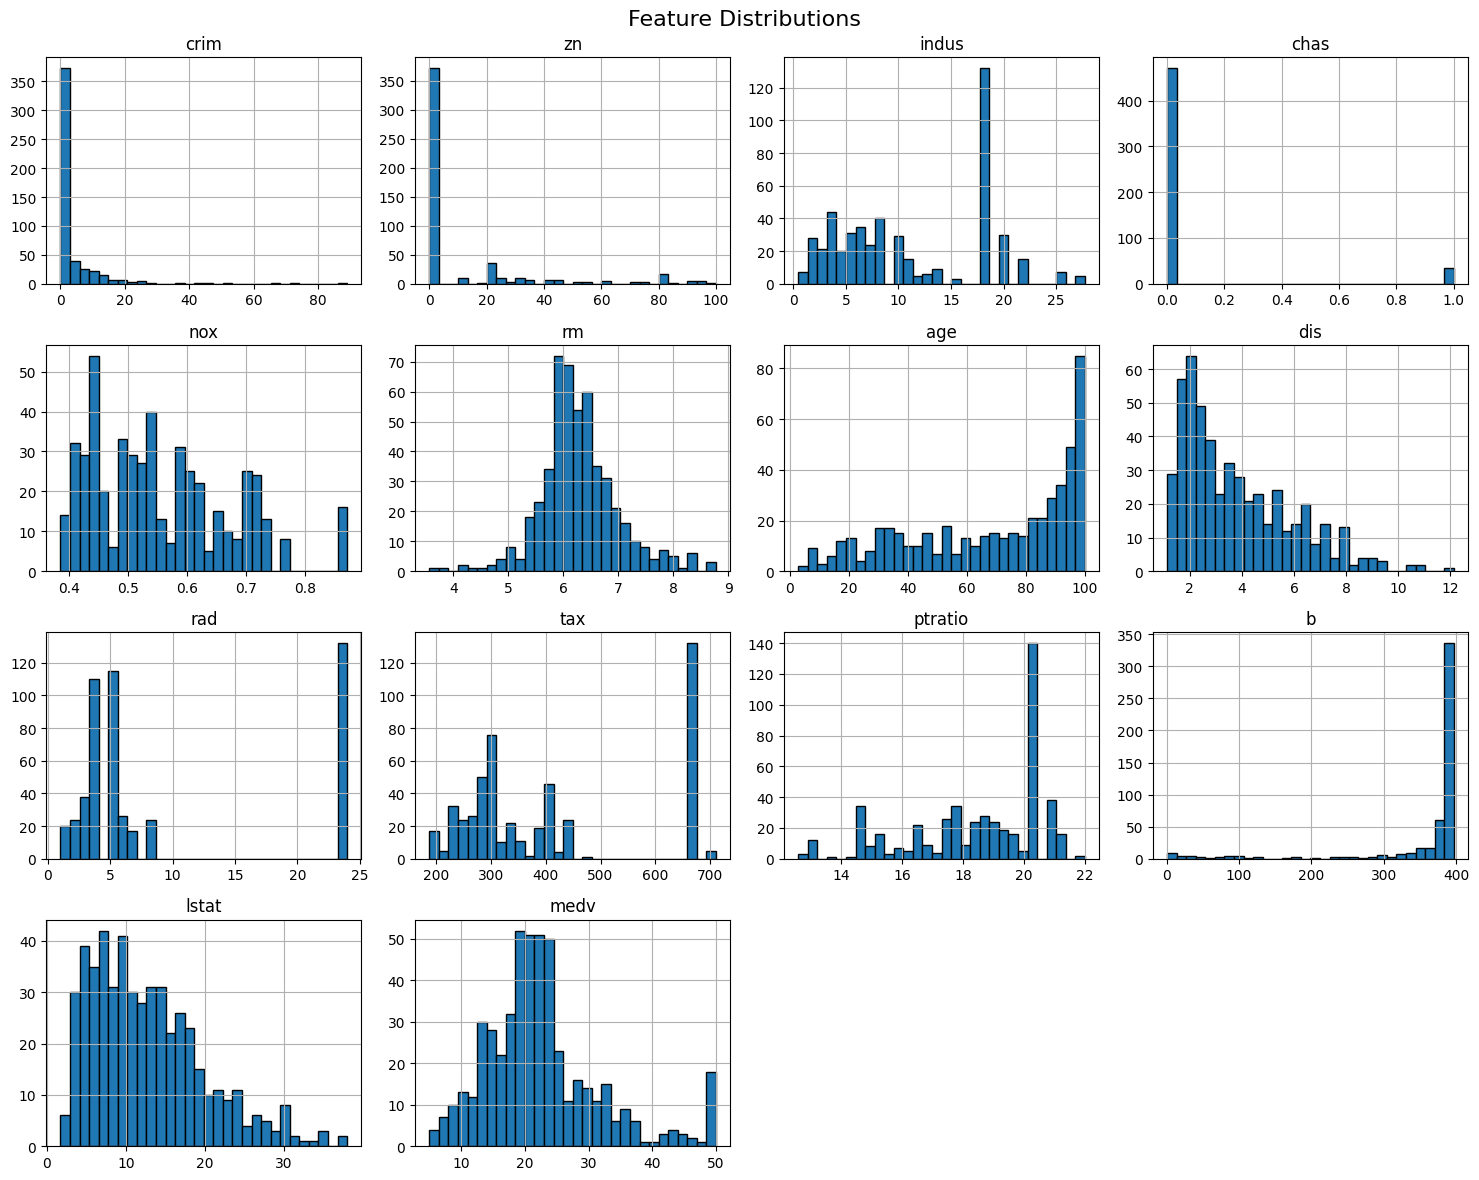

In [6]:
# Plot histograms for all features
df.hist(figsize=(15,12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-7-1cf5aec6bcc6>:4: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


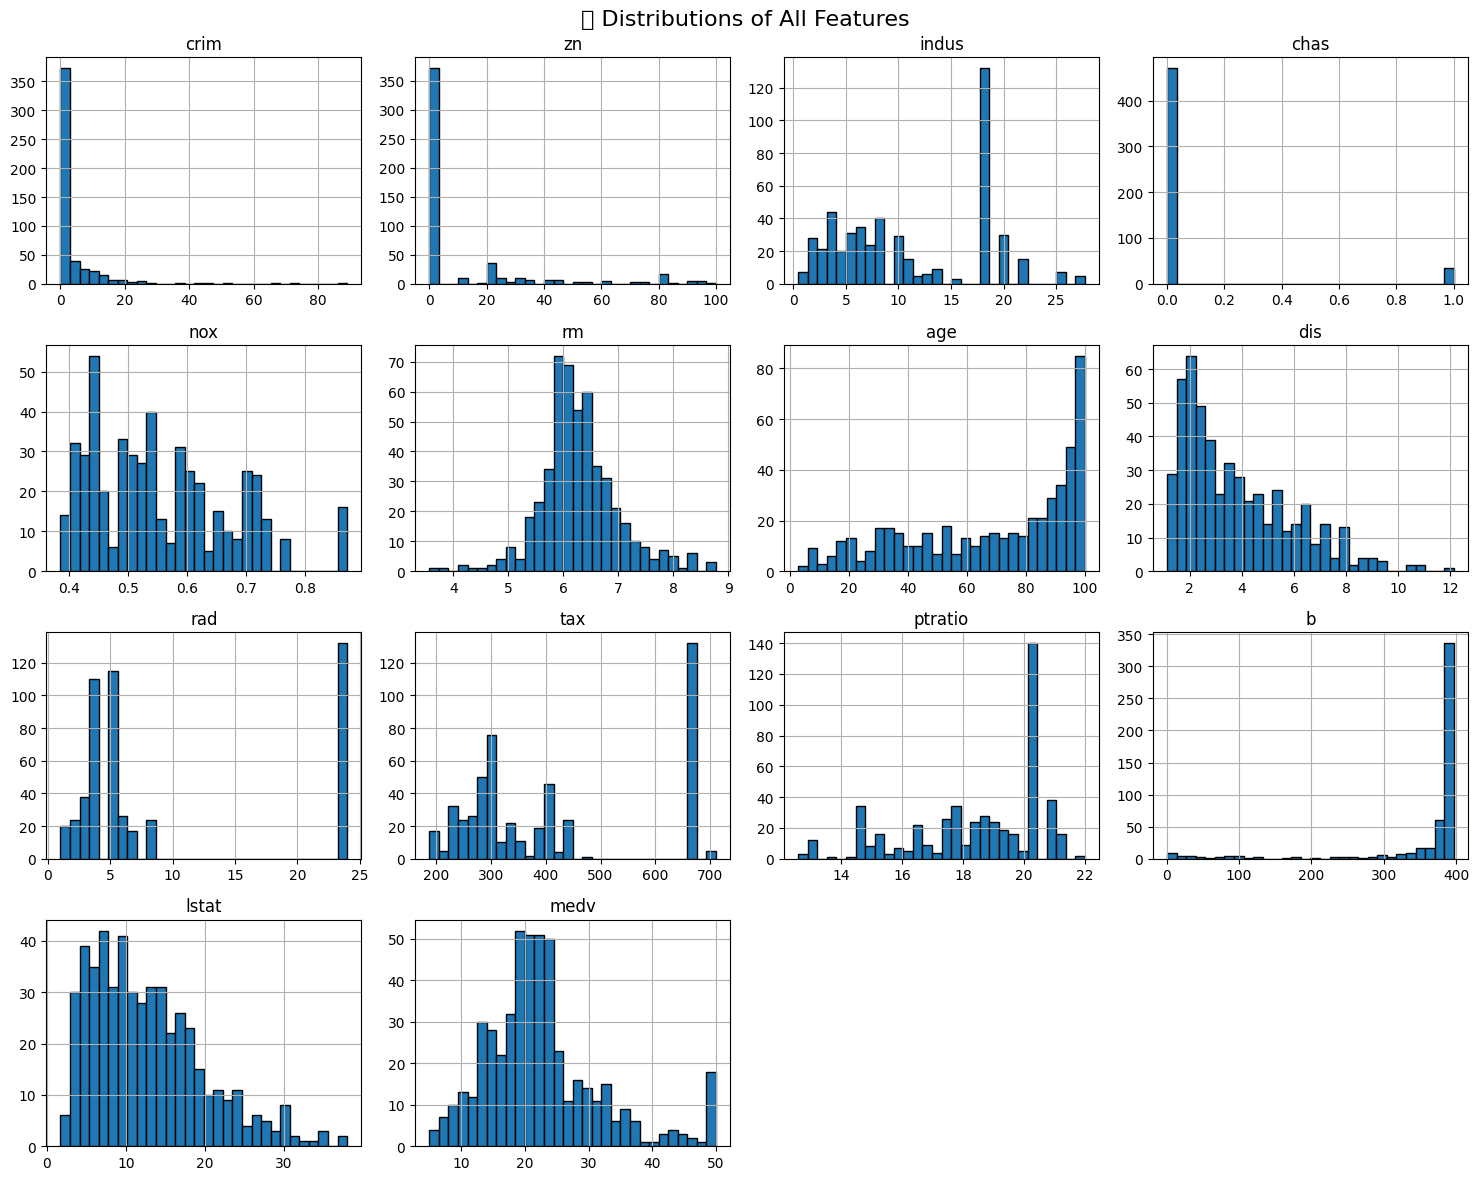

In [7]:
# 1. Histogram for each feature
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("🔍 Distributions of All Features", fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


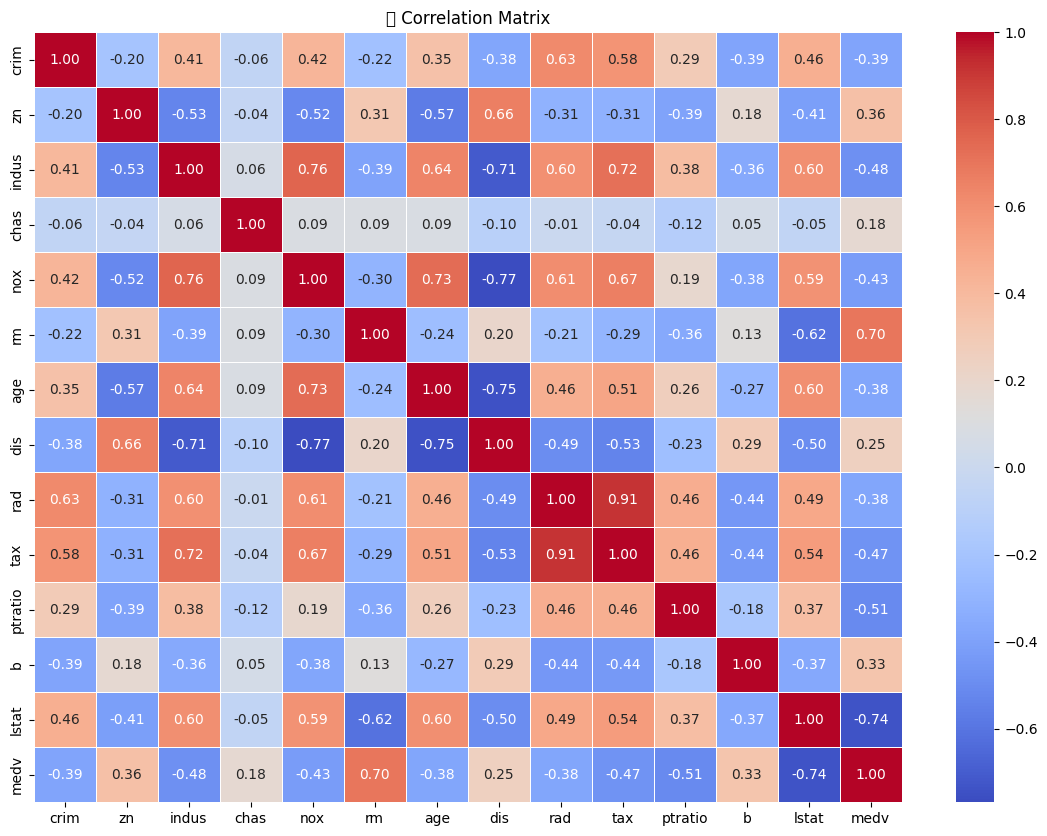

In [8]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📌 Correlation Matrix")
plt.show()


<ipython-input-10-685a5367d379>:5: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


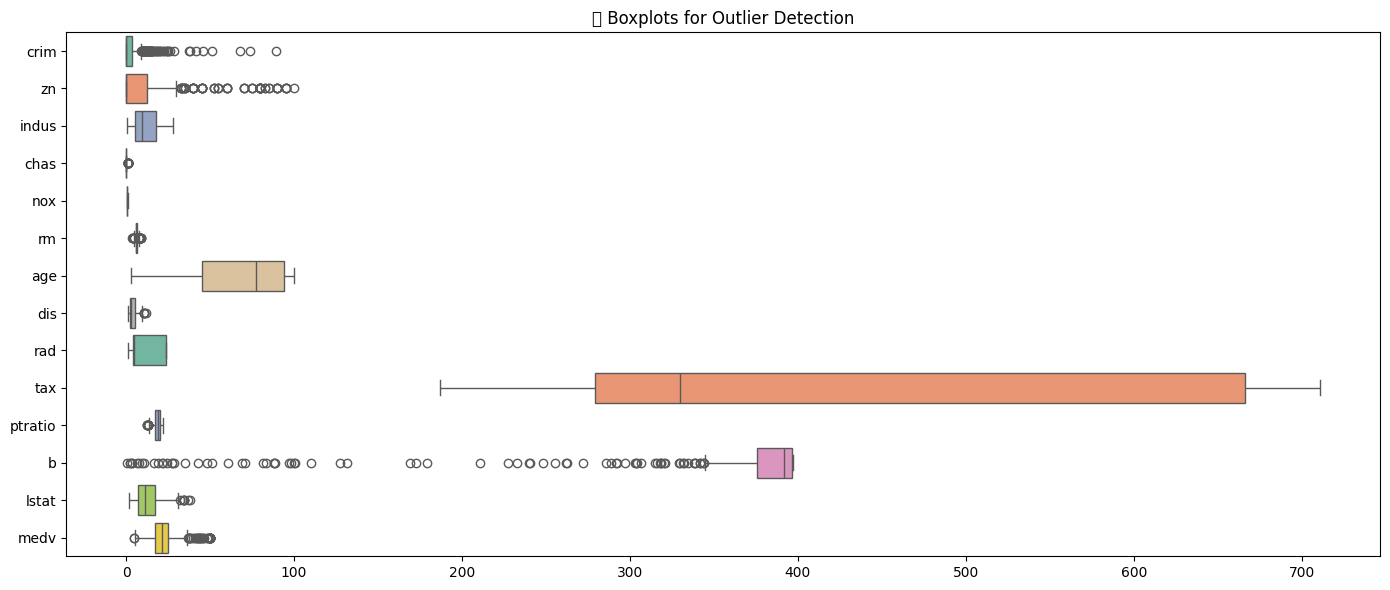

In [10]:
# 4. Boxplots to detect outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("📦 Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BostonHousing.csv")

# Display the names of all variables (columns)
print("Variable Names in the Dataset:")
print(df.columns.tolist())


Variable Names in the Dataset:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


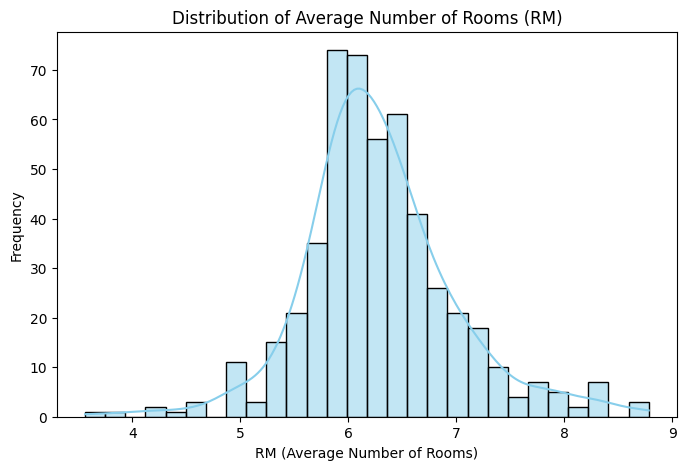

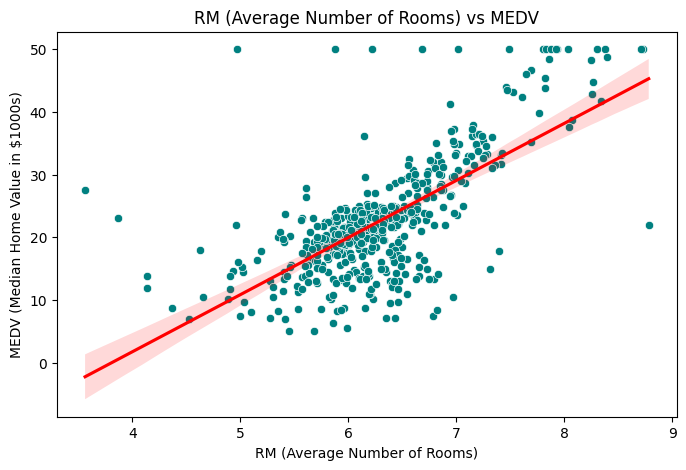

Correlation of RM with MEDV: 
            rm      medv
rm    1.000000  0.696169
medv  0.696169  1.000000


In [12]:
# Plot histogram for RM
plt.figure(figsize=(8, 5))
sns.histplot(df['rm'], kde=True, color='skyblue')
plt.title('Distribution of Average Number of Rooms (RM)')
plt.xlabel('RM (Average Number of Rooms)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for RM vs MEDV
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rm', y='medv', data=df, color='teal')
sns.regplot(x='rm', y='medv', data=df, scatter=False, color='red')
plt.title('RM (Average Number of Rooms) vs MEDV')
plt.xlabel('RM (Average Number of Rooms)')
plt.ylabel('MEDV (Median Home Value in $1000s)')
plt.show()

# Correlation of RM with target (MEDV)
cor_rm = df[['rm', 'medv']].corr()
print(f"Correlation of RM with MEDV: \n{cor_rm}")

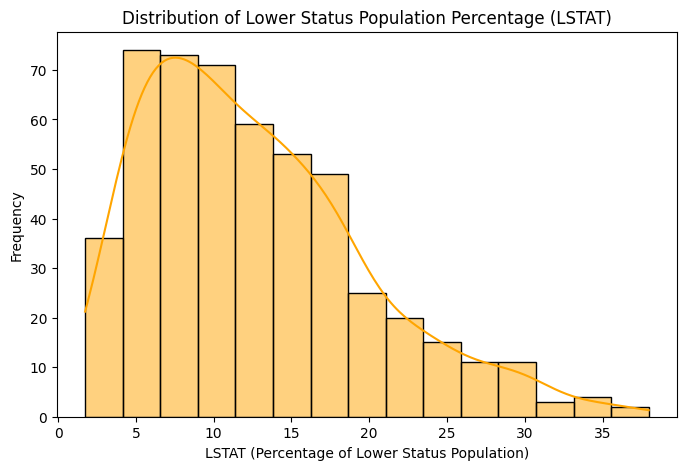

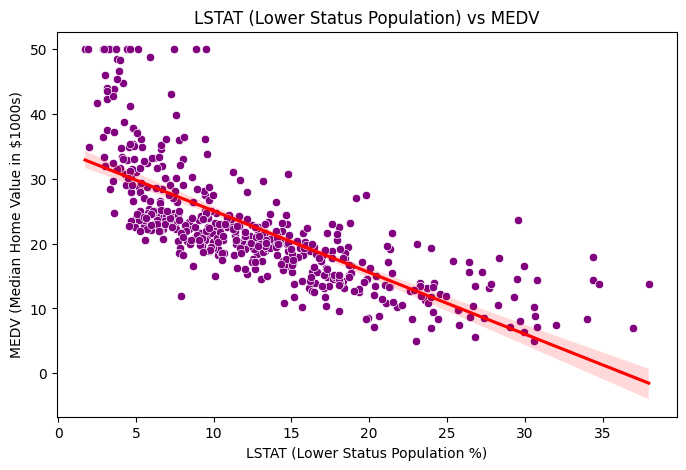

Correlation of LSTAT with MEDV: 
          lstat      medv
lstat  1.000000 -0.737663
medv  -0.737663  1.000000


In [14]:
# Plot histogram for LSTAT
plt.figure(figsize=(8, 5))
sns.histplot(df['lstat'], kde=True, color='orange')
plt.title('Distribution of Lower Status Population Percentage (LSTAT)')
plt.xlabel('LSTAT (Percentage of Lower Status Population)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for LSTAT vs MEDV
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lstat', y='medv', data=df, color='purple')
sns.regplot(x='lstat', y='medv', data=df, scatter=False, color='red')
plt.title('LSTAT (Lower Status Population) vs MEDV')
plt.xlabel('LSTAT (Lower Status Population %)')
plt.ylabel('MEDV (Median Home Value in $1000s)')
plt.show()

# Correlation of LSTAT with target (MEDV)
cor_lstat = df[['lstat', 'medv']].corr()
print(f"Correlation of LSTAT with MEDV: \n{cor_lstat}")


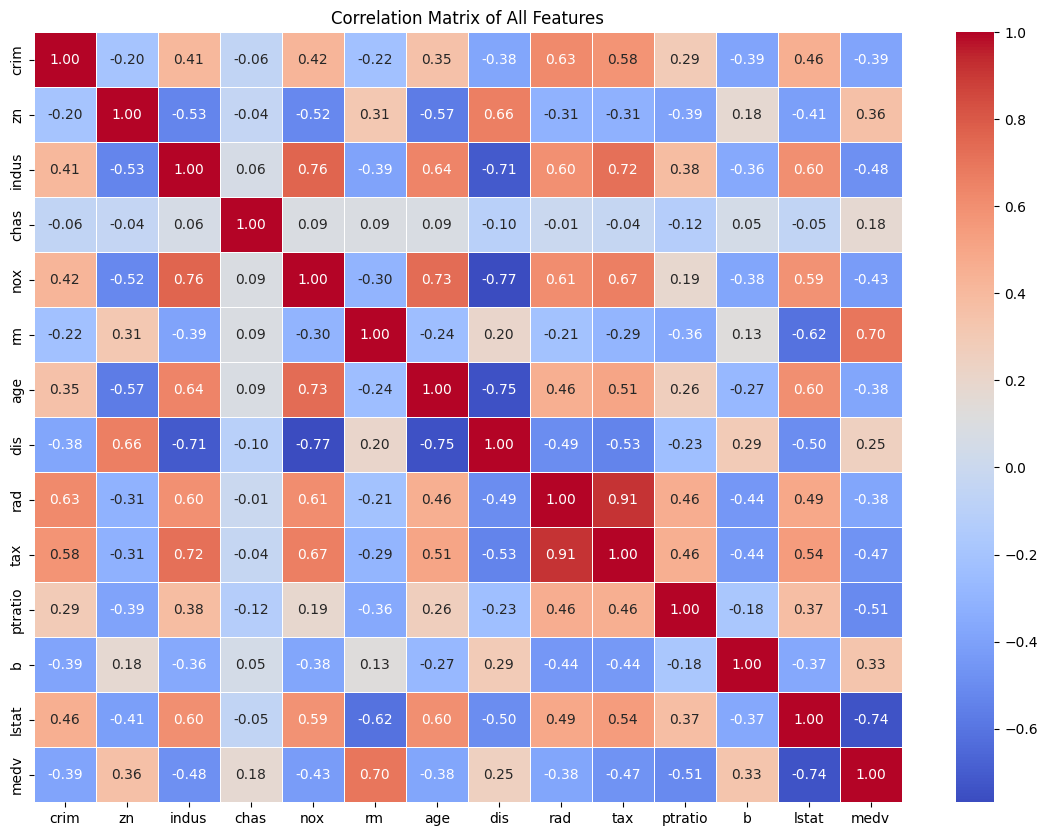

In [15]:
# Compute correlation matrix for all features
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()


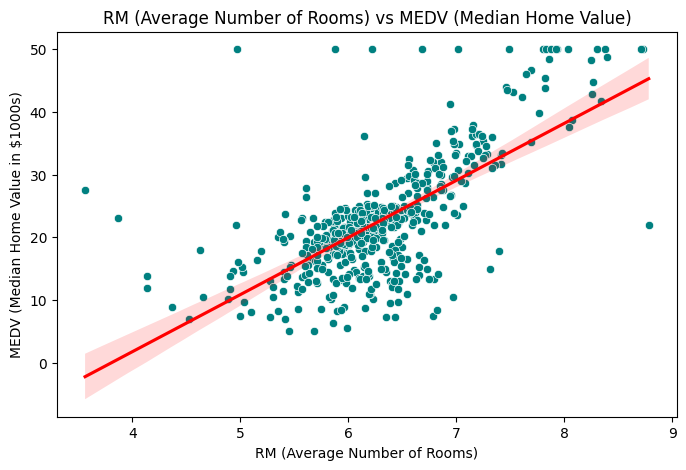

Correlation between RM and MEDV: 
            rm      medv
rm    1.000000  0.696169
medv  0.696169  1.000000


In [16]:
# Scatter plot for RM vs MEDV
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rm', y='medv', data=df, color='teal')
sns.regplot(x='rm', y='medv', data=df, scatter=False, color='red')
plt.title('RM (Average Number of Rooms) vs MEDV (Median Home Value)')
plt.xlabel('RM (Average Number of Rooms)')
plt.ylabel('MEDV (Median Home Value in $1000s)')
plt.show()

# Calculate correlation between RM and MEDV
cor_rm_medv = df[['rm', 'medv']].corr()
print(f"Correlation between RM and MEDV: \n{cor_rm_medv}")


In [19]:
# Impute missing values in 'RM' with the median of the column
df['rm'].fillna(df['rm'].median(), inplace=True)

# Check if missing values are handled
print(df.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


<ipython-input-19-cb81b2407358>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].median(), inplace=True)


In [20]:
# Drop rows with missing values
df.dropna(subset=['rm'], inplace=True)

# Check again for missing values
print(df.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


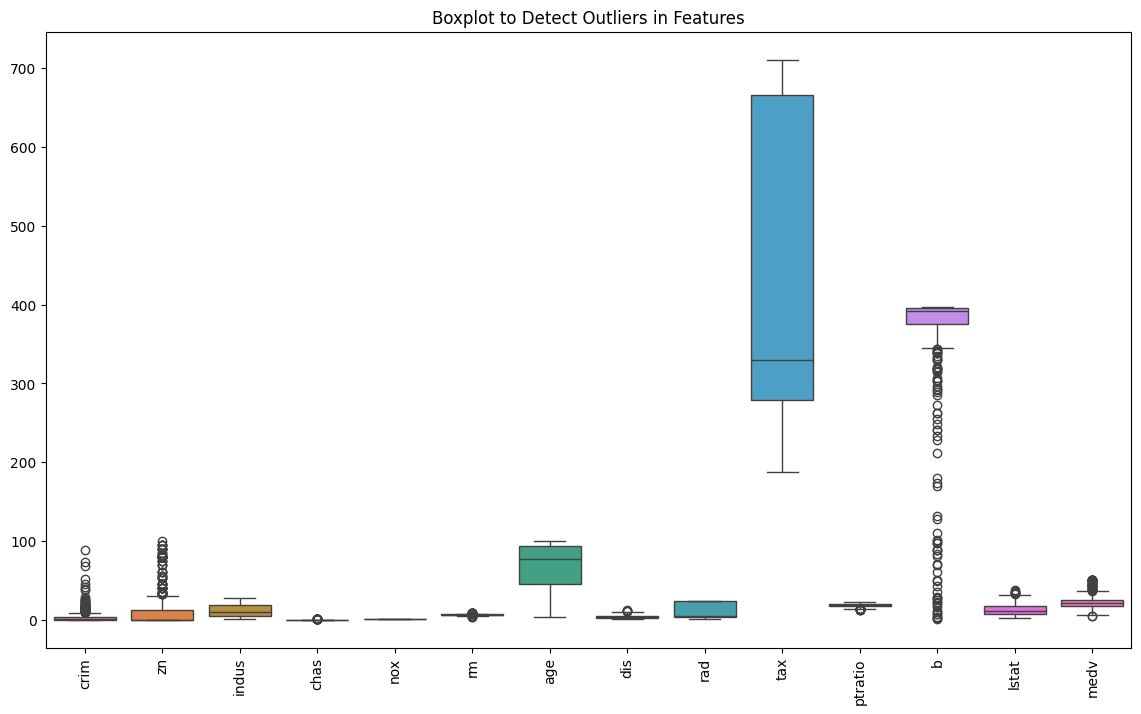

In [21]:
# Boxplot to detect outliers for each feature
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title("Boxplot to Detect Outliers in Features")
plt.xticks(rotation=90)
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['medv']))

# You can create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.drop(columns=['medv']).columns)

# Check the scaled dataset
print(scaled_df.head())


       crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.415455 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.195904  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.285105 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.018507 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.230930 -0.511180   

        dis       rad       tax   ptratio         b     lstat  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  
